# Breast Cancer Detection
## Using the Breast Cancer Wisconsin (Original) Data Set, we will create a model to make predictions on whether a patient's cancer is malignant or benign.

Source:

Creator:

Dr. WIlliam H. Wolberg (physician)
University of Wisconsin Hospitals
Madison, Wisconsin, USA

Donor:

Olvi Mangasarian (mangasarian '@' cs.wisc.edu)
Received by David W. Aha (aha '@' cs.jhu.edu)


Data Set Information:

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

Group 1: 367 instances (January 1989)
Group 2: 70 instances (October 1989)
Group 3: 31 instances (February 1990)
Group 4: 17 instances (April 1990)
Group 5: 48 instances (August 1990)
Group 6: 49 instances (Updated January 1991)
Group 7: 31 instances (June 1991)
Group 8: 86 instances (November 1991)
-----------------------------------------
Total: 699 points (as of the donated datbase on 15 July 1992)

Note that the results summarized above in Past Usage refer to a dataset of size 369, while Group 1 has only 367 instances. This is because it originally contained 369 instances; 2 were removed. The following statements summarizes changes to the original Group 1's set of data:

##### Group 1 : 367 points: 200B 167M (January 1989)

##### Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805

##### Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
##### : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
##### : Changed 0 to 1 in field 6 of sample 1219406
##### : Changed 0 to 1 in field 8 of following sample:
##### : 1182404,2,3,1,1,1,2,0,1,1,1


Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)


Relevant Papers:

Wolberg, W.H., & Mangasarian, O.L. (1990). Multisurface method of pattern separation for medical diagnosis applied to breast cytology. In Proceedings of the National Academy of Sciences, 87, 9193--9196.
[Web Link]

Zhang, J. (1992). Selecting typical instances in instance-based learning. In Proceedings of the Ninth International Machine Learning Conference (pp. 470--479). Aberdeen, Scotland: Morgan Kaufmann.
[Web Link]



## Loading the main modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
pd.options.display.max_columns = 32

## Loading the dataset

In [2]:
df = pd.read_csv('breastCancer.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

### The dataset contains 699 rows and 11 columns.

In [4]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

### The dataset contains 452 benign and 238 malignant cases.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### No missing values in the dataset.
### bare_nucleoli is appearing as an object instead of an integer type.

In [6]:
df[~df.bare_nucleoli.str.isdigit()]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


### The reason is the question mark (?) string in places where there's missing values.

In [7]:
df = df.replace('?', np.nan)
df = df.fillna(df.median())
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [8]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

## Checking for duplicate entries

In [9]:
df[df.duplicated(keep=False)].sort_values(by='id')

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
267,320675,3,3,5,2,3,10,7,1,1,4
272,320675,3,3,5,2,3,10,7,1,1,4
683,466906,1,1,1,1,2,1,1,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2
314,704097,1,1,1,1,1,1,2,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
321,733639,3,1,1,1,2,1,3,1,1,2
322,733639,3,1,1,1,2,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
42,1100524,6,10,10,2,8,10,7,3,3,4


### There are 9 duplicate rows in the dataset. They will be dropped.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Dropping the "id" column

In [12]:
df.drop(columns='id', inplace=True)

# Exploratory Data Analysis

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,690.0,4.428986,2.817378,1.0,2.0,4.0,6.0,10.0
size_uniformity,690.0,3.133333,3.042451,1.0,1.0,1.0,5.0,10.0
shape_uniformity,690.0,3.204348,2.960844,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,690.0,2.827536,2.867787,1.0,1.0,1.0,4.0,10.0
epithelial_size,690.0,3.213043,2.200964,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,690.0,3.482609,3.617064,1.0,1.0,1.0,5.0,10.0
bland_chromatin,690.0,3.436232,2.444060,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,690.0,2.885507,3.067682,1.0,1.0,1.0,4.0,10.0
mitoses,690.0,1.594203,1.724230,1.0,1.0,1.0,1.0,10.0
class,690.0,2.689855,0.951379,2.0,2.0,2.0,4.0,4.0


## Univariate Data Analysis

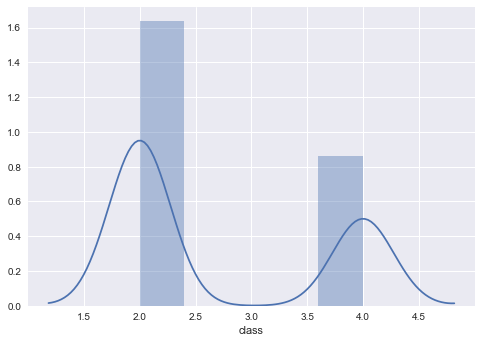

In [14]:
sns.distplot(df['class'])
plt.show()

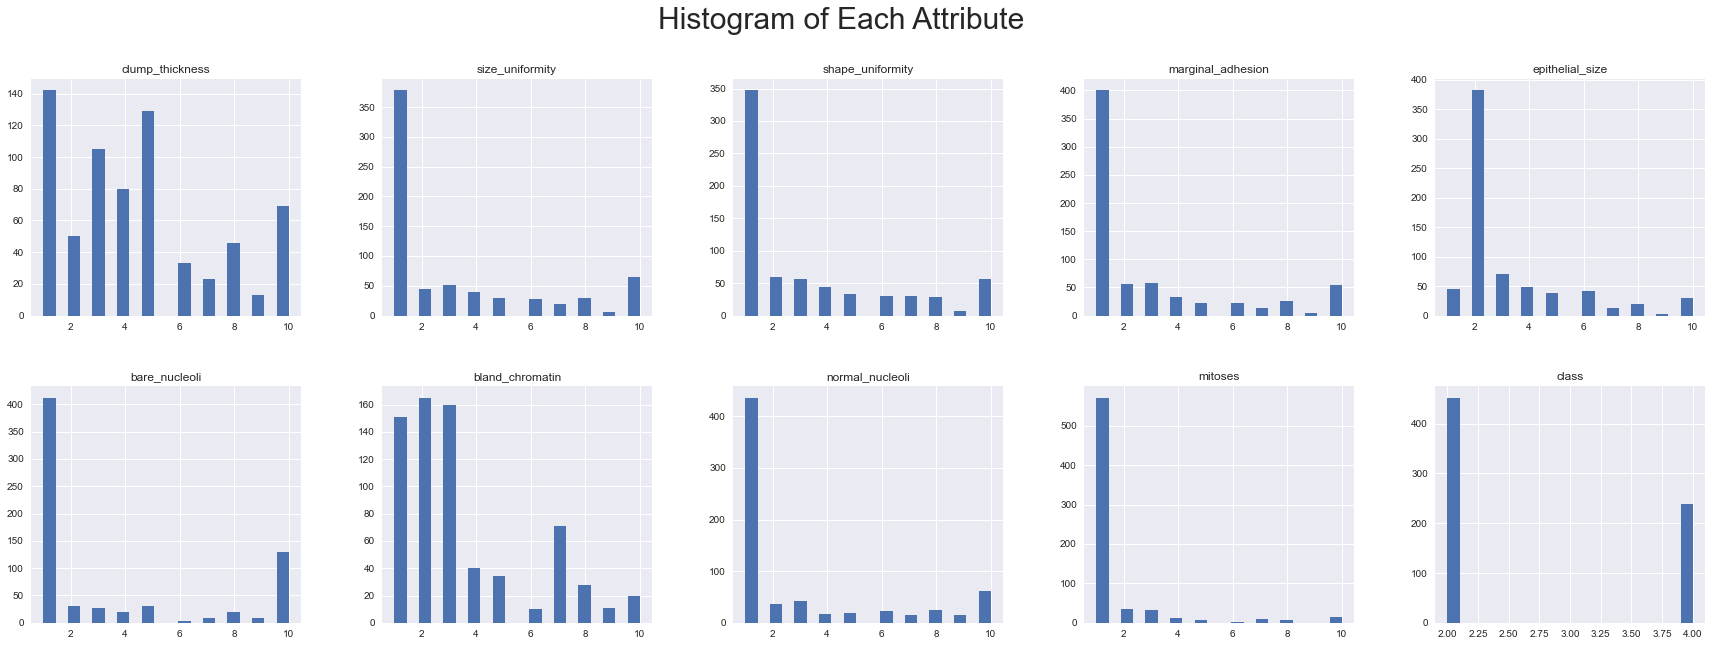

In [15]:
df.hist(bins=20, figsize=(30,10), layout=(2,5))
plt.suptitle('Histogram of Each Attribute', fontsize=30)
plt.show()

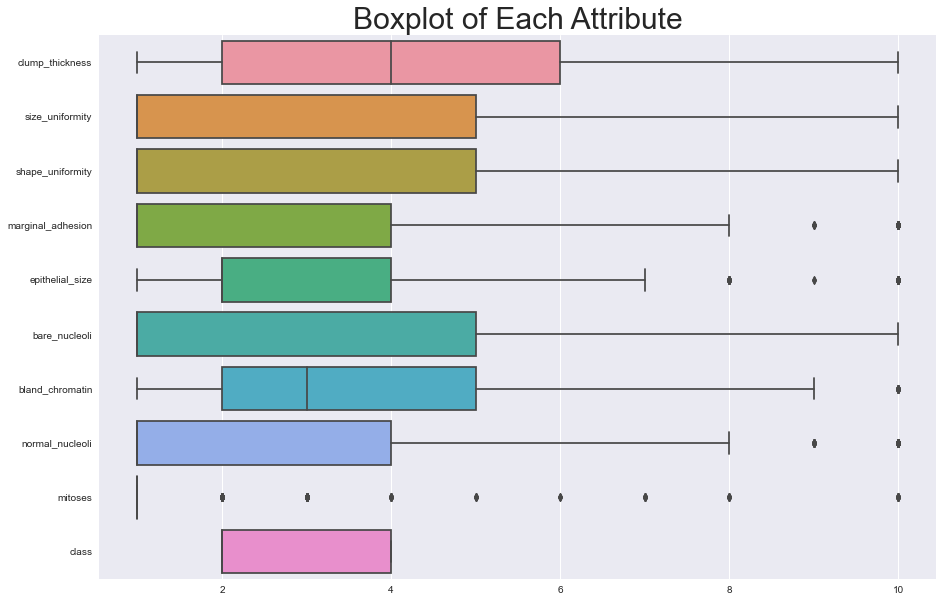

In [16]:
plt.figure(figsize=(15,10))
plt.title('Boxplot of Each Attribute', fontsize=30)
sns.boxplot(data=df, orient='h')
plt.show()

## Bivariate Data Analysis

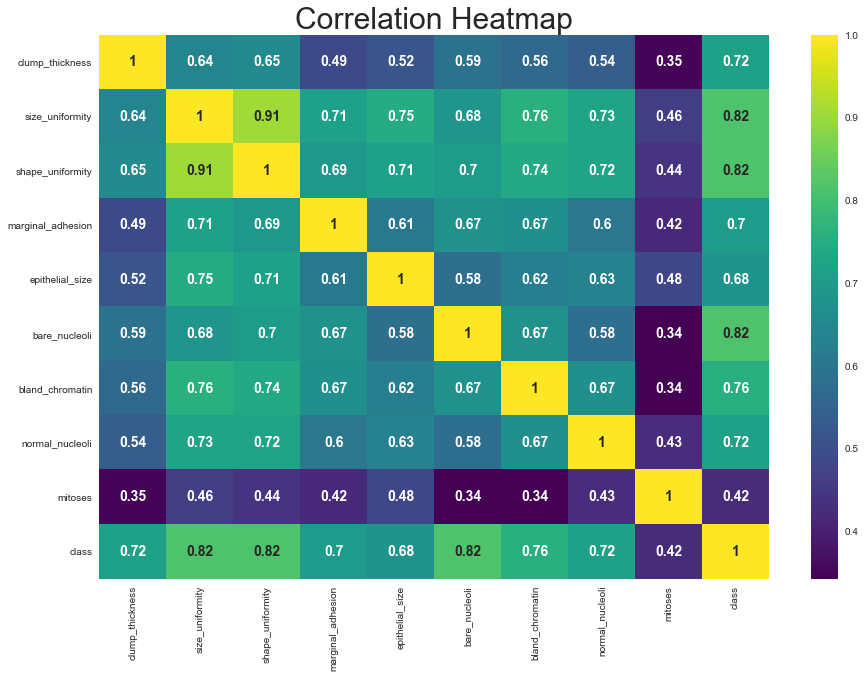

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize': 14,'fontweight': 'bold'}, cmap='viridis')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

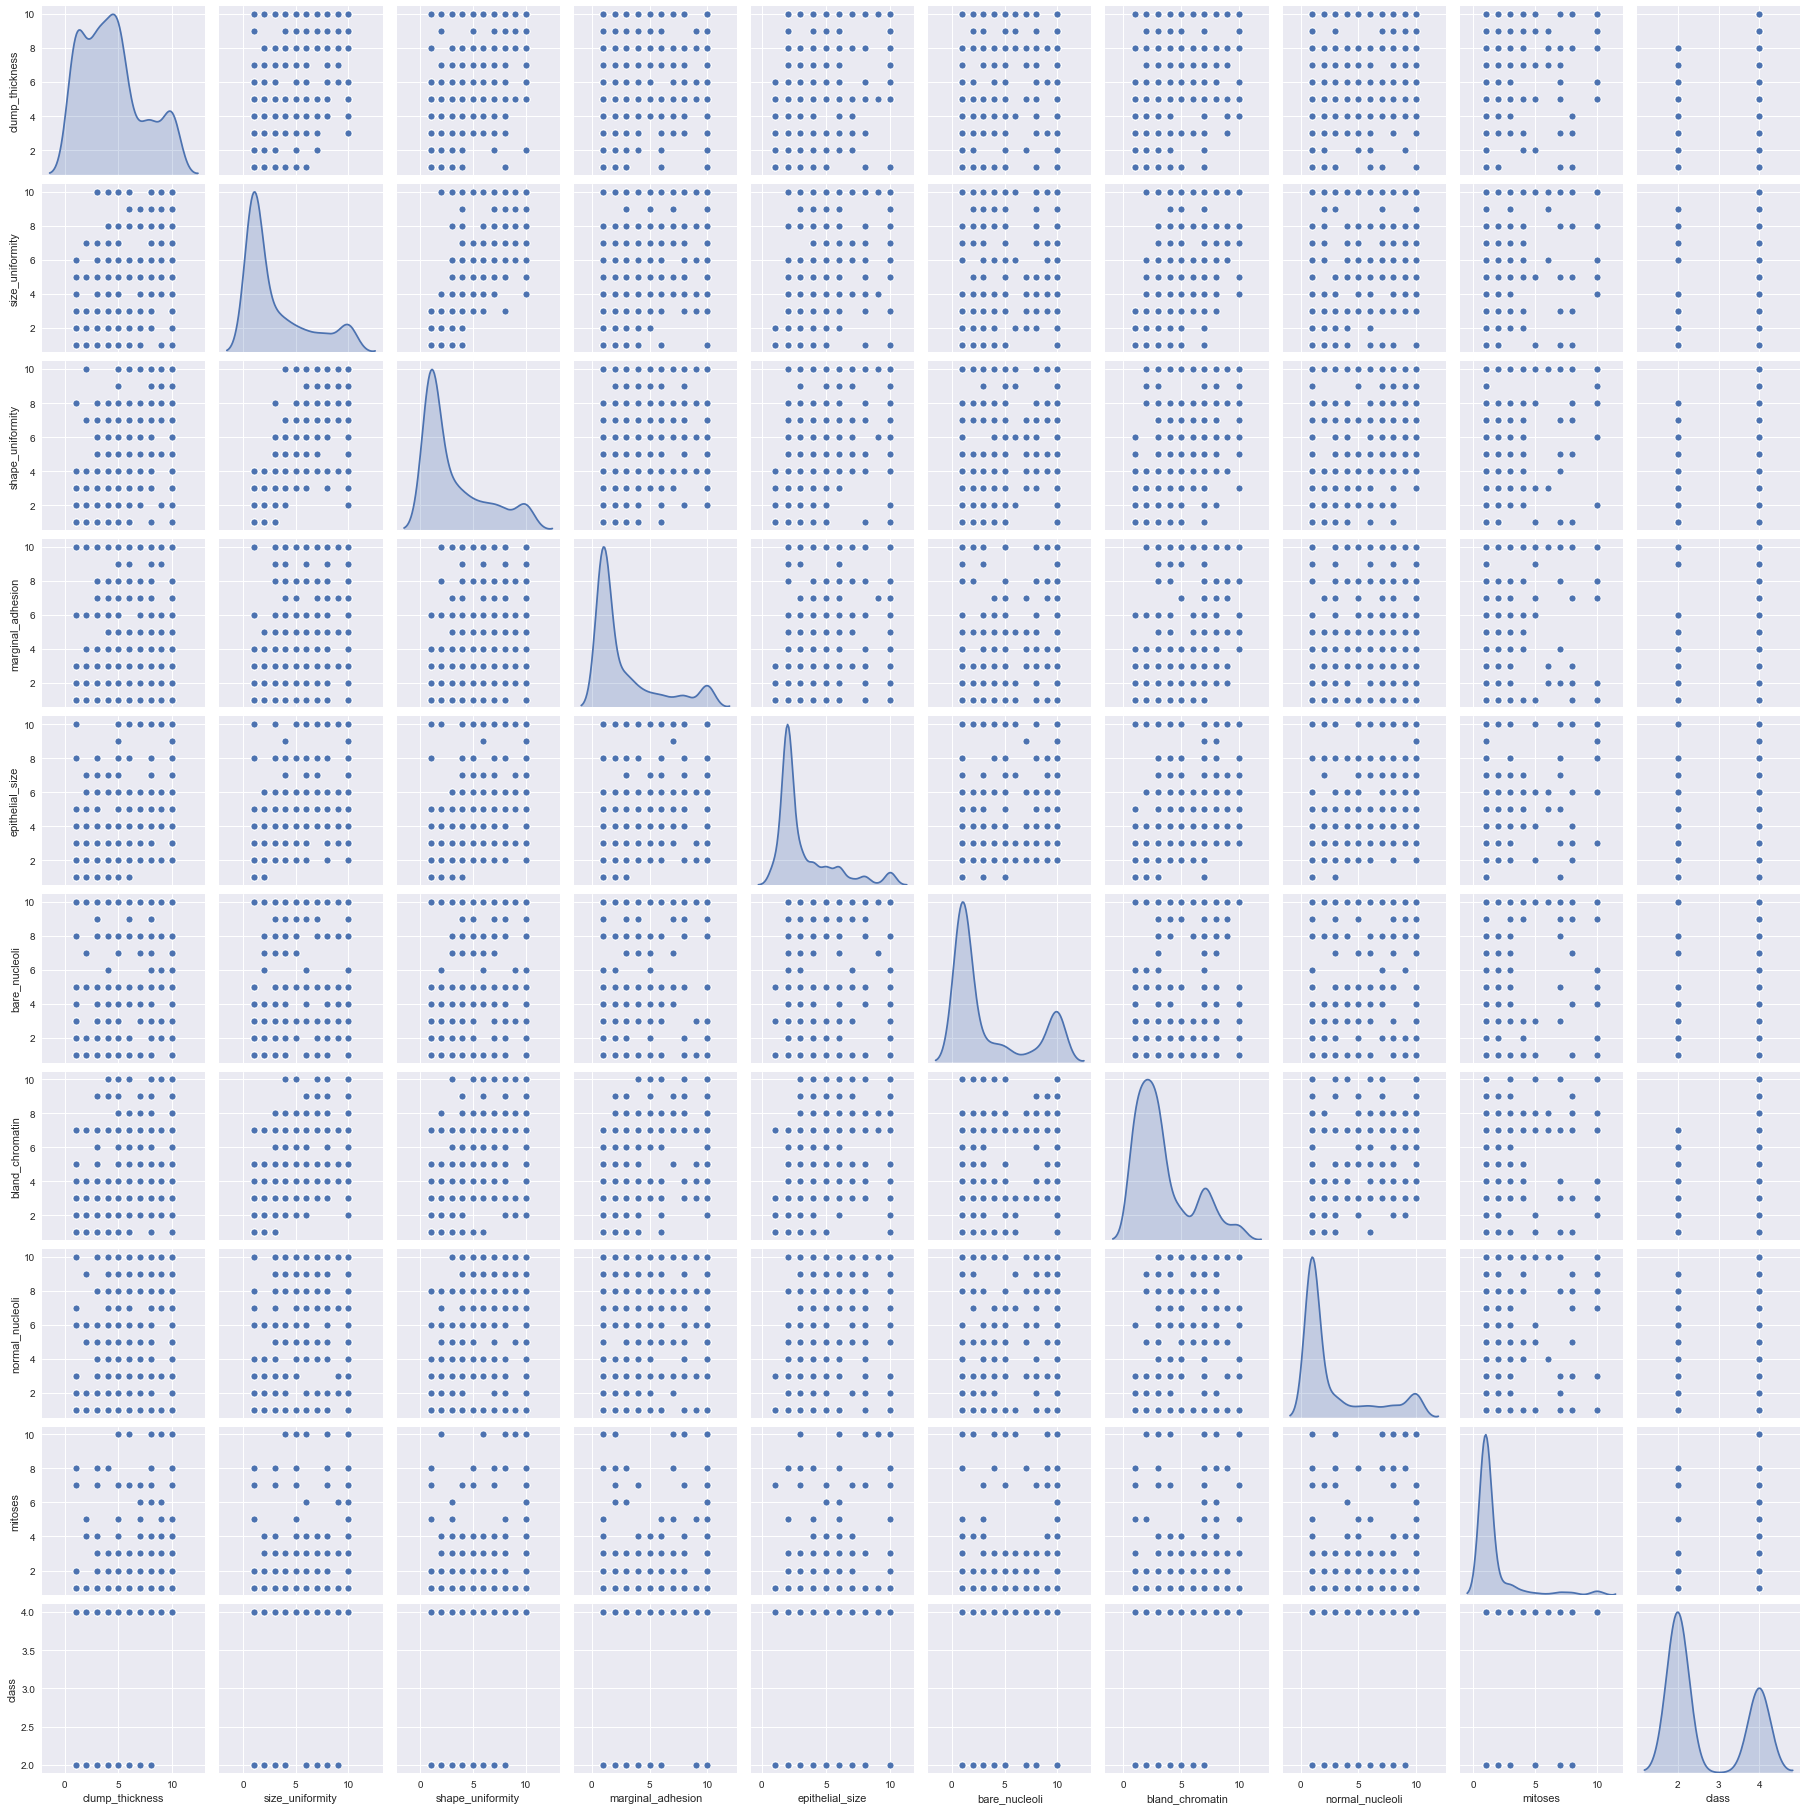

In [18]:
sns.pairplot(df, diag_kind='kde')

# Building the Model (K Neighbors Classifier)

In [19]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [20]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Finding the k value with the least errors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 11):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

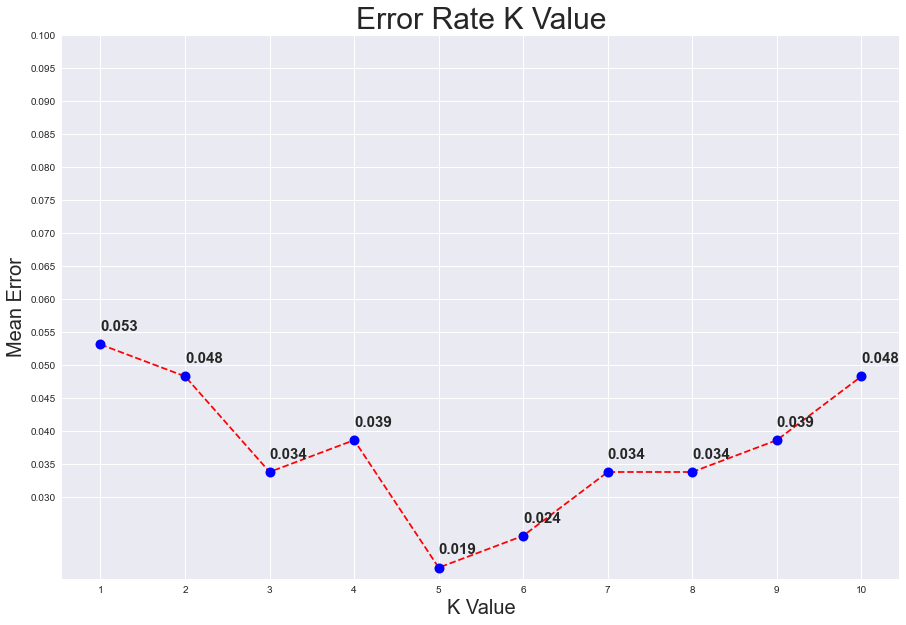

In [23]:
plt.figure(figsize=(15, 10))  
plt.plot(range(1, 11), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value', fontsize=30)  
plt.xlabel('K Value', fontsize=20)
plt.ylabel('Mean Error', fontsize=20)
plt.yticks(ticks=np.arange(0.03, 0.10, 0.005))
plt.xticks(ticks=np.arange(1,11))
for i in range(1, len(error)+1):
    plt.text(i, error[i-1]+0.002, round(error[i-1], 3), fontdict={'fontweight': 'bold', 'fontsize': 15})
plt.show()

### k=5 gives us the minimum amount of errors.

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

## Checking the accuracy of the model

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Accuracy Score: {np.round(knn.score(X_test, y_test), 3)*100}%\n{'='*50}")
print(f"Classification Report:\n{classification_report(y_test, knn_pred)}\n{'='*50}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, knn_pred)}\n{'='*50}")

Accuracy Score: 98.1%
Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.98      0.99       144
           4       0.95      0.98      0.97        63

    accuracy                           0.98       207
   macro avg       0.97      0.98      0.98       207
weighted avg       0.98      0.98      0.98       207

Confusion Matrix:
[[141   3]
 [  1  62]]


# Building the Model (Support Vector Classifier)

In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [27]:
print(f"Accuracy Score: {np.round(svc.score(X_test, y_test), 3)*100}%\n{'='*50}")
print(f"Classification Report:\n{classification_report(y_test, svc_pred)}\n{'='*50}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, svc_pred)}\n{'='*50}")

Accuracy Score: 97.1%
Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       144
           4       0.94      0.97      0.95        63

    accuracy                           0.97       207
   macro avg       0.96      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207

Confusion Matrix:
[[140   4]
 [  2  61]]


In [28]:
results = pd.DataFrame({'Actual': y_test, 'KNN': knn_pred, 'SVC': svc_pred})
results

,Actual,KNN,SVC
674,2,2,2
527,2,2,2
690,2,2,2
23,4,2,4
65,4,4,4
...,...,...,...
342,2,2,2
547,2,2,2
662,2,2,2
195,2,2,2


### K Neighbors Classifier does a better job at classifying than Support Vector Classifier.